In [3]:
import pandas as pd
import json

# 1. Criando um Dataset Fake (Simulando um CSV carregado)
data = {
    'Data': ['2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03', '2024-01-04'],
    'Produto': ['Notebook', 'Mouse', 'Notebook', 'Teclado', 'Mouse', 'Monitor'],
    'Categoria': ['Eletrônicos', 'Acessórios', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Eletrônicos'],
    'Valor': [4500.00, 150.00, 4200.00, 200.00, 150.00, 1200.00],
    'Quantidade': [1, 5, 2, 10, 3, 1]
}

df = pd.DataFrame(data) # Convertendo dict para DataFrame

df['Total'] = df['Valor'] * df['Quantidade']

# 1. Convertendo Texto para Data Real (Datetime)
# Dica: Procure por pd.to_datetime
df['Data'] = pd.to_datetime(df['Data'])

# 2. Criando novas Features (Colunas) a partir da Data
# O objeto .dt é o acessador de propriedades de data
df['Mes'] = df['Data'].dt.month
df['Dia_Semana'] = df['Data'].dt.day_name() # Retorna "Monday", "Tuesday"...

# 3. Responda com código:
# Qual foi o TOTAL de vendas (Soma da coluna 'Total') vendido na Categoria 'Eletrônicos'?
# Dica: Use filtragem df[...] e depois .sum()

vendas_eletronicos = df[df['Categoria'] == 'Eletrônicos']['Total'].sum()

print(f"Vendas de Eletrônicos: R$ {vendas_eletronicos}")
display(df)

# 2. As 3 Funções Sagradas da Inspeção
print("--- 1. Cabeçalho (Top 5 linhas) ---")
display(df.head()) # No Jupyter, use display() ao invés de print() para ficar bonito

print("\n--- 2. Estrutura dos Dados (Schema) ---")
df.info() # Mostra tipos (int, float, object) e nulos

print("\n--- 3. Estatística Descritiva (O Poder!) ---")
display(df.describe())

Vendas de Eletrônicos: R$ 14100.0


,Data,Produto,Categoria,Valor,Quantidade,Total,Mes,Dia_Semana
0,2024-01-01,Notebook,Eletrônicos,4500.0,1,4500.0,1,Monday
1,2024-01-02,Mouse,Acessórios,150.0,5,750.0,1,Tuesday
2,2024-01-02,Notebook,Eletrônicos,4200.0,2,8400.0,1,Tuesday
3,2024-01-03,Teclado,Acessórios,200.0,10,2000.0,1,Wednesday
4,2024-01-03,Mouse,Acessórios,150.0,3,450.0,1,Wednesday
5,2024-01-04,Monitor,Eletrônicos,1200.0,1,1200.0,1,Thursday


--- 1. Cabeçalho (Top 5 linhas) ---


,Data,Produto,Categoria,Valor,Quantidade,Total,Mes,Dia_Semana
0,2024-01-01,Notebook,Eletrônicos,4500.0,1,4500.0,1,Monday
1,2024-01-02,Mouse,Acessórios,150.0,5,750.0,1,Tuesday
2,2024-01-02,Notebook,Eletrônicos,4200.0,2,8400.0,1,Tuesday
3,2024-01-03,Teclado,Acessórios,200.0,10,2000.0,1,Wednesday
4,2024-01-03,Mouse,Acessórios,150.0,3,450.0,1,Wednesday



--- 2. Estrutura dos Dados (Schema) ---
<class 'pandas.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        6 non-null      datetime64[us]
 1   Produto     6 non-null      str           
 2   Categoria   6 non-null      str           
 3   Valor       6 non-null      float64       
 4   Quantidade  6 non-null      int64         
 5   Total       6 non-null      float64       
 6   Mes         6 non-null      int32         
 7   Dia_Semana  6 non-null      str           
dtypes: datetime64[us](1), float64(2), int32(1), int64(1), str(3)
memory usage: 492.0 bytes

--- 3. Estatística Descritiva (O Poder!) ---


,Data,Valor,Quantidade,Total,Mes
count,6,6.000000,6.000000,6.000000,6.0
mean,2024-01-02 12:00:00,1733.333333,3.666667,2883.333333,1.0
min,2024-01-01 00:00:00,150.000000,1.000000,450.000000,1.0
25%,2024-01-02 00:00:00,162.500000,1.250000,862.500000,1.0
50%,2024-01-02 12:00:00,700.000000,2.500000,1600.000000,1.0
75%,2024-01-03 00:00:00,3450.000000,4.500000,3875.000000,1.0
max,2024-01-04 00:00:00,4500.000000,10.000000,8400.000000,1.0
std,NaN,2068.252080,3.444803,3070.287717,0.0


--- Tabela Resumo ---


Categoria
Acessórios      3200.0
Eletrônicos    14100.0
Name: Total, dtype: float64

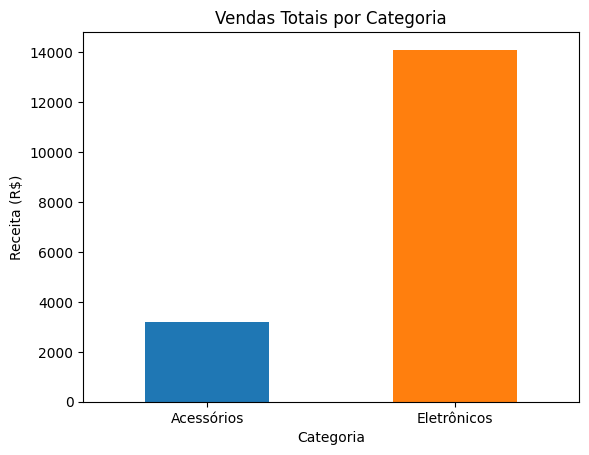

✅ Arquivo 'relatorio_vendas.csv' salvo com sucesso!


In [5]:
import matplotlib.pyplot as plt # O Pandas usa ele por baixo dos panos

# 1. Agrupamento (Group By) - O "Pivot Table" do Python
# "Agrupe por Categoria e some a coluna Total"
resumo_categoria = df.groupby('Categoria')['Total'].sum()

print("--- Tabela Resumo ---")
display(resumo_categoria)

# 2. Plotagem Rápida (Built-in do Pandas)
# kind='bar' (Barras), rot=0 (Rotação do texto)
resumo_categoria.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], rot=0)
plt.title("Vendas Totais por Categoria")
plt.ylabel("Receita (R$)")
plt.show()

# 3. Salvando o trabalho (Persistência)
# index=False evita salvar os números 0,1,2... das linhas no arquivo
df.to_csv('relatorio_vendas.csv', index=False)
print("✅ Arquivo 'relatorio_vendas.csv' salvo com sucesso!")